In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
random_state = 42

In [2]:
kmeans = KMeans(n_clusters=8, 
                init='k-means++', 
                n_init='auto', 
                max_iter=300, 
                tol=0.0001, 
                verbose=0, 
                random_state=None, 
                copy_x=True, 
                algorithm='lloyd')

**Dataset**

In [14]:
# Generate sample data
#n_samples = 10000

#X, _ = make_blobs(n_samples=n_samples, centers=2, random_state=random_state)

In [15]:
data = {"Number of Followers": [0, 10, 15, 20, 5,  38,  20,  15,  210, 200, 220, 190, 0,   6,   15,  10,  200, 180, 150, 170, 8, 12, 210, 230, 190, 220, 210, 190],
        "Number of Posts":     [2, 5,  7,  5,  20, 100, 105, 145, 200, 150, 185, 155, 120, 150, 170, 170, 500, 550, 400, 470, 8, 10, 160, 180, 165, 470, 490, 450]
       }

df = pd.DataFrame(data)
df

,Number of Followers,Number of Posts
0,0,2
1,10,5
2,15,7
3,20,5
4,5,20
5,38,100
6,20,105
7,15,145
8,210,200
9,200,150


In [16]:
X = df[["Number of Followers", "Number of Posts"]].values

**fit kmeans**

/home/frauke/miniconda3/envs/gen_env/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/frauke/miniconda3/envs/gen_env/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/frauke/miniconda3/envs/gen_env/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


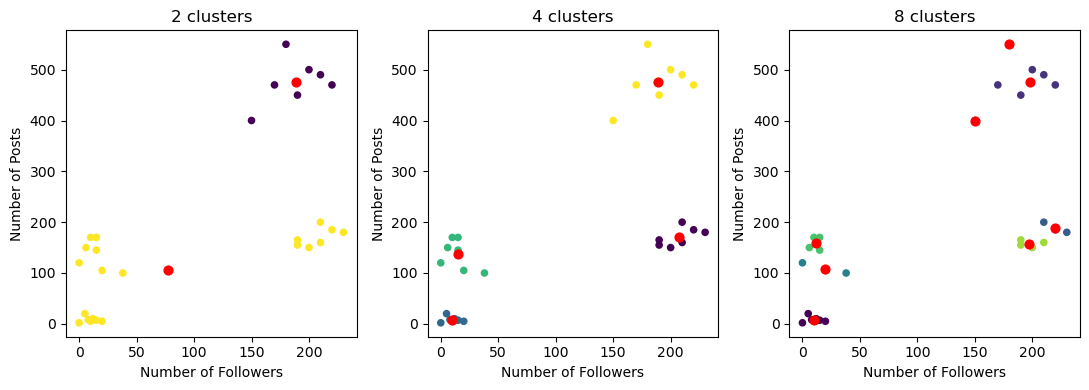

In [17]:
# Make subplots for each variant
n_clusters_list = [2, 4, 8]

fig, axs = plt.subplots(1, len(n_clusters_list), figsize=(11, 4))


for j, n_clusters in enumerate(n_clusters_list):
    kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
    kmeans.fit(X)
    centers = kmeans.cluster_centers_

    axs[j].scatter(X[:, 0], X[:, 1], s=20, c=kmeans.labels_)
    axs[j].scatter(centers[:, 0], centers[:, 1], c="r", s=40)

    axs[j].set_title(f"{n_clusters} clusters")
    axs[j].set_xlabel("Number of Followers")
    axs[j].set_ylabel("Number of Posts")
plt.tight_layout()
plt.savefig("different_clusters.png")

**Elbow Method**

/home/frauke/miniconda3/envs/gen_env/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/frauke/miniconda3/envs/gen_env/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/frauke/miniconda3/envs/gen_env/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/frauke/miniconda3/envs/gen_env/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1412: FutureW

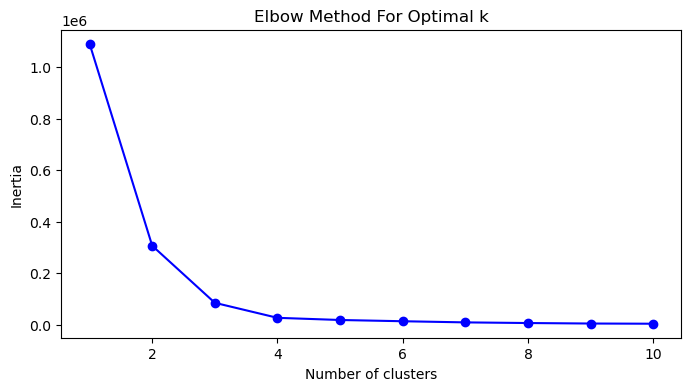

In [7]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Elbow Method to find the optimal k
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
    inertia.append(kmeans.inertia_)

# Plotting the results
plt.figure(figsize=(8, 4))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.savefig("elbow_method.png")

**Silhouette Score**

/home/frauke/miniconda3/envs/gen_env/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/frauke/miniconda3/envs/gen_env/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/frauke/miniconda3/envs/gen_env/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/frauke/miniconda3/envs/gen_env/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1412: FutureW

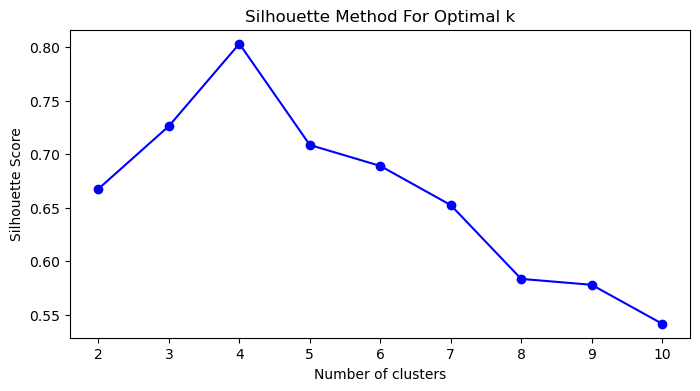

In [8]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# Silhouette Method to find the optimal k
silhouette_scores = []
K = range(2, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(score)

# Plotting the results
plt.figure(figsize=(8, 4))
plt.plot(K, silhouette_scores, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method For Optimal k')
plt.savefig("silhouette_score.png")

**Small Datatset**

In [9]:
#X = np.array([[2.5, 2], [2.5, 3.5], [2, 2.5],
#              [4, 1.5], [3.5, 2], [3.3, 1]])
#kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(X)
#labels = kmeans.labels_
#centers = kmeans.cluster_centers_

In [10]:
#fig, axs = plt.subplots(1, 1, figsize=(8, 8))

#axs.scatter(X[:, 0], X[:, 1], s=80, c=kmeans.labels_)
#axs.scatter(centers[:, 0], centers[:, 1], c="r", s=100)
#axs.set_ylim(0, 4)

#axs.label_outer()
#axs.set_xticks([])
#axs.set_yticks([]);

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Generate sample data
n_samples = 100

X, _ = make_blobs(n_samples=n_samples, centers=4, random_state=random_state)

def kmeans(X, k, max_iters=10):
    # Randomly choose k data points as initial centroids
    np.random.seed(0)
    centroids = X[np.random.choice(X.shape[0], k, replace=False)]
    
    for i in range(max_iters):
        # Assign clusters based on the closest centroids
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
        cluster_labels = np.argmin(distances, axis=1)
        
        # Plot the centroids for each iteration
        plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, s=20, cmap='viridis')
        plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=40, alpha=0.75)#, marker='X')
        plt.title(f'Iteration {i+1}')
        plt.savefig(f'iteration_{i+1}.png')
        plt.show()
        
        # Calculate new centroids from the means of the points
        new_centroids = np.array([X[cluster_labels == j].mean(axis=0) for j in range(k)])
        
        # Check for convergence (if centroids do not change)
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids


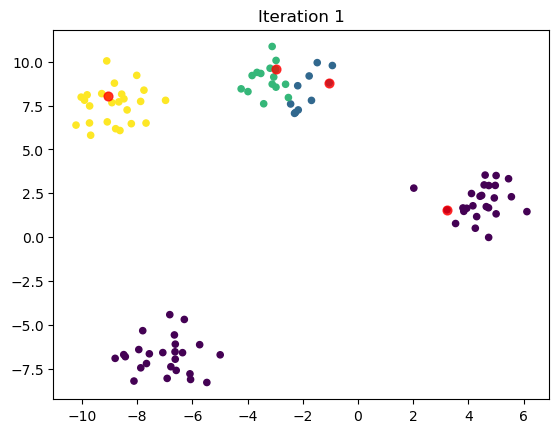

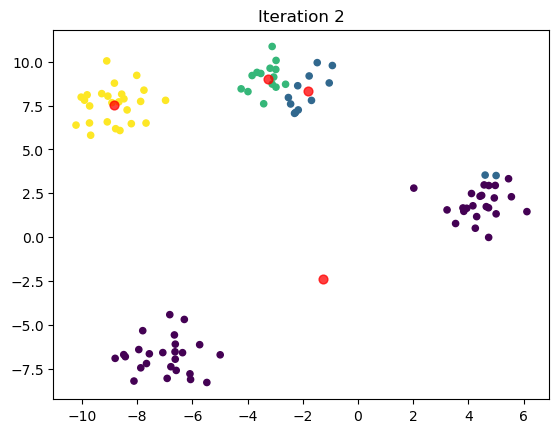

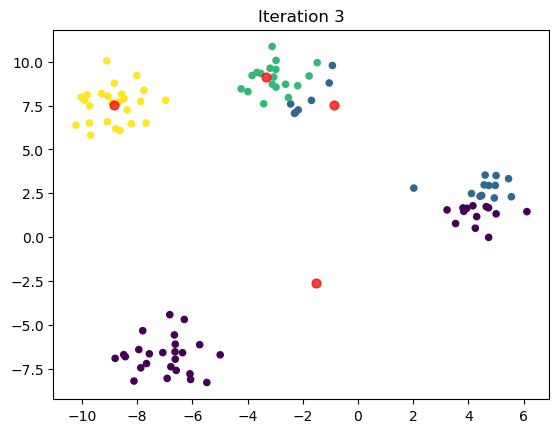

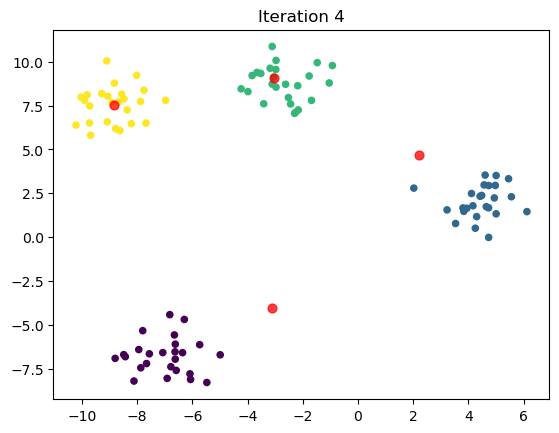

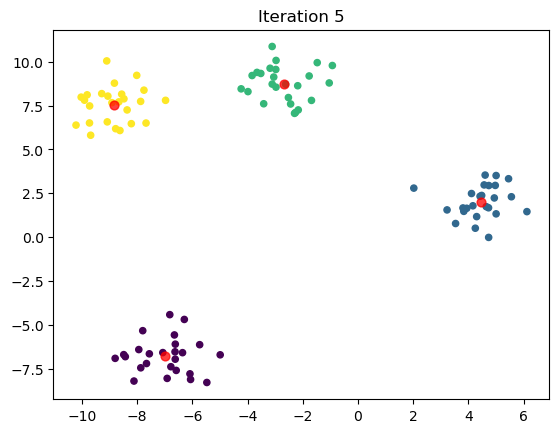

In [12]:
kmeans(X, k=4, max_iters=10)